In [1]:
from solar_system import *
from params import *
from visualise import *
import matplotlib.pyplot as plt
import itertools
import time
import scipy as sp

In [31]:
ns = np.logspace(2, 8, 20, base=2, dtype=int)
print(ns)

[  4   4   6   7   9  11  14  18  23  28  35  44  55  68  85 106 132 165
 205 256]


In [51]:
ns = np.linspace(1, 1000, 20, dtype=int)
print(ns)

[   1   53  106  158  211  263  316  369  421  474  526  579  631  684
  737  789  842  894  947 1000]


In [57]:
num_repeats = 10

In [58]:
# ns = np.logspace(2, 5, 20, base=2, dtype=int)
# ns = np.linspace(1, 50000, 40, dtype=int)
non_octree_times = []
octree_times = []
memory_error_ot = False
memory_error_not = False
for n in ns:
    print(n)
    rs = np.random.uniform(-50, 50, (n, p.num_dimensions))
    ms = np.array([1]*n)
    
    if not memory_error_ot:
        try:
            ts = time.time()
            for _ in range(num_repeats):
                rs_tuple = tuple(map(tuple, rs))
                ms_tuple = tuple(ms)
                find_acc_cpp(rs_tuple, ms_tuple, (p.unit_mass_particle_radius, p.qt, p.G))
                # octree = Octree(np.array([0, 0, 0]), 100, rs, ms)
                # octree.find_acc_v(rs, ms)
            tf = time.time()
            octree_times.append((tf-ts)/num_repeats)
        except MemoryError:
            print('Memory error ot')
            memory_error_ot = True
    
    if not memory_error_not:
        try:
            ts = time.time()
            for _ in range(num_repeats):
                find_acc_v(rs, ms, n)
            tf = time.time()
            non_octree_times.append((tf-ts)/num_repeats)
        except MemoryError:
            print('Memory error not')
            memory_error_not = True

1
53
106
158
211


C:\Users\jackg\Documents\python_projects\solar_system\general_functions.py:43: RuntimeWarning: invalid value encountered in less
  a_mesh = np.where(dist_mesh.reshape(n, n, 1) < particle_radius_mesh.reshape(n, n, 1),


263
316
369
421
474
526
579
631
684
737
789
842
894
947
1000


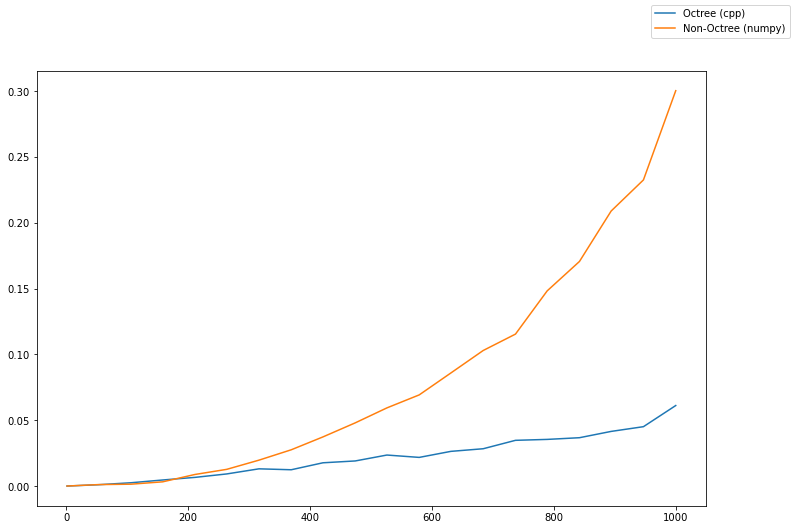

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(ns[:len(octree_times)], octree_times, label='Octree (cpp)')
ax.plot(ns[:len(non_octree_times)], non_octree_times, label='Non-Octree (numpy)')
fig.legend()

In [44]:
a, b, c = np.polyfit(ns[:len(non_octree_times)], non_octree_times, deg=2)
def non_octree_times_extrap(n):
    return c + b*n + a*n**2

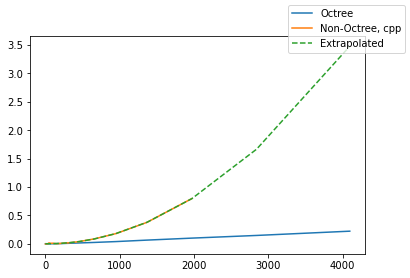

In [45]:
fig, ax = plt.subplots()
ax.plot(ns[:len(octree_times)], octree_times, label='Octree (cpp)')
ax.plot(ns[:len(non_octree_times)], non_octree_times, label='Non-Octree (numpy)')
ax.plot(ns, [non_octree_times_extrap(n) for n in ns], label='Extrapolated', linestyle='--')
fig.legend()
plt.show()